# ***Data Exploration & Cleaning***

In [37]:
import pandas as pd
import numpy as np
from camel_converter import to_snake
from matplotlib import pyplot as plt
import seaborn as sns


plt.style.use("dark_background")

In [13]:
test_df = pd.read_csv("../data/raw/customer_churn_dataset-testing-master.csv")
train_df = pd.read_csv("../data/raw/customer_churn_dataset-training-master.csv")

In [14]:
(train_df.shape, test_df.shape)

((440833, 12), (64374, 12))

In [15]:
# concat 2 datasets into 1: df
df = pd.concat([train_df, test_df])

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 505207 entries, 0 to 64373
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         505206 non-null  float64
 1   Age                505206 non-null  float64
 2   Gender             505206 non-null  object 
 3   Tenure             505206 non-null  float64
 4   Usage Frequency    505206 non-null  float64
 5   Support Calls      505206 non-null  float64
 6   Payment Delay      505206 non-null  float64
 7   Subscription Type  505206 non-null  object 
 8   Contract Length    505206 non-null  object 
 9   Total Spend        505206 non-null  float64
 10  Last Interaction   505206 non-null  float64
 11  Churn              505206 non-null  float64
dtypes: float64(9), object(3)
memory usage: 50.1+ MB


In [17]:
df.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


In [18]:
df.dtypes

CustomerID           float64
Age                  float64
Gender                object
Tenure               float64
Usage Frequency      float64
Support Calls        float64
Payment Delay        float64
Subscription Type     object
Contract Length       object
Total Spend          float64
Last Interaction     float64
Churn                float64
dtype: object

In [19]:
df.describe()

,CustomerID,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
count,505206.000000,505206.000000,505206.000000,505206.000000,505206.000000,505206.000000,505206.000000,505206.000000,505206.000000
mean,200779.451782,39.704172,31.350435,15.714825,3.833317,13.496843,620.072766,14.610581,0.555203
std,137241.343095,12.670577,17.237482,8.619323,3.133603,8.451187,245.319256,8.608286,0.496944
min,1.000000,18.000000,1.000000,1.000000,0.000000,0.000000,100.000000,1.000000,0.000000
25%,63827.250000,29.000000,16.000000,8.000000,1.000000,6.000000,446.000000,7.000000,0.000000
50%,193039.500000,40.000000,32.000000,16.000000,3.000000,13.000000,648.900000,14.000000,1.000000
75%,321645.750000,49.000000,46.000000,23.000000,6.000000,20.000000,824.000000,22.000000,1.000000
max,449999.000000,65.000000,60.000000,30.000000,10.000000,30.000000,1000.000000,30.000000,1.000000


In [20]:
df.describe(include="O")

,Gender,Subscription Type,Contract Length
count,505206,505206,505206
unique,2,3,3
top,Male,Standard,Annual
freq,280273,170630,198608


### ***Change column name format***

In [21]:
df.columns = [to_snake(each).replace(" ", "") for each in df.columns]
df.columns

Index(['customer_i_d', 'age', 'gender', 'tenure', 'usage_frequency',
       'support_calls', 'payment_delay', 'subscription_type',
       'contract_length', 'total_spend', 'last_interaction', 'churn'],
      dtype='object')

### ***Drop unwanted features***

In [22]:
df.head()

,customer_i_d,age,gender,tenure,usage_frequency,support_calls,payment_delay,subscription_type,contract_length,total_spend,last_interaction,churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


In [23]:
df = df.drop(["customer_i_d"], axis=1)

### ***Dtype convertion***

In [24]:
df.dtypes

age                  float64
gender                object
tenure               float64
usage_frequency      float64
support_calls        float64
payment_delay        float64
subscription_type     object
contract_length       object
total_spend          float64
last_interaction     float64
churn                float64
dtype: object

In [25]:
to_integer = df.drop(
    ["total_spend", "gender", "subscription_type", "contract_length"], axis=1
).columns
df[to_integer] = df[to_integer].astype(dtype="Int16")

In [26]:
df.head()

,age,gender,tenure,usage_frequency,support_calls,payment_delay,subscription_type,contract_length,total_spend,last_interaction,churn
0,30,Female,39,14,5,18,Standard,Annual,932.0,17,1
1,65,Female,49,1,10,8,Basic,Monthly,557.0,6,1
2,55,Female,14,4,6,18,Basic,Quarterly,185.0,3,1
3,58,Male,38,21,7,7,Standard,Monthly,396.0,29,1
4,23,Male,32,20,5,8,Basic,Monthly,617.0,20,1


### ***Drop duplicated rows***

In [27]:
df[df.duplicated()]  # there is no duplicated rows here

,age,gender,tenure,usage_frequency,support_calls,payment_delay,subscription_type,contract_length,total_spend,last_interaction,churn


### ***Missing Values***

In [28]:
df.isna().sum()

age                  1
gender               1
tenure               1
usage_frequency      1
support_calls        1
payment_delay        1
subscription_type    1
contract_length      1
total_spend          1
last_interaction     1
churn                1
dtype: int64

In [29]:
df = df.loc[df.isna().mean(axis=1) * 100 < 1]  # drop the empty sample

In [30]:
df.isna().sum()

age                  0
gender               0
tenure               0
usage_frequency      0
support_calls        0
payment_delay        0
subscription_type    0
contract_length      0
total_spend          0
last_interaction     0
churn                0
dtype: int64

### ***Outlier Treatment***

In [61]:
numerical_columns = df.select_dtypes(np.number).columns
categorical_columns = df.select_dtypes("O").columns

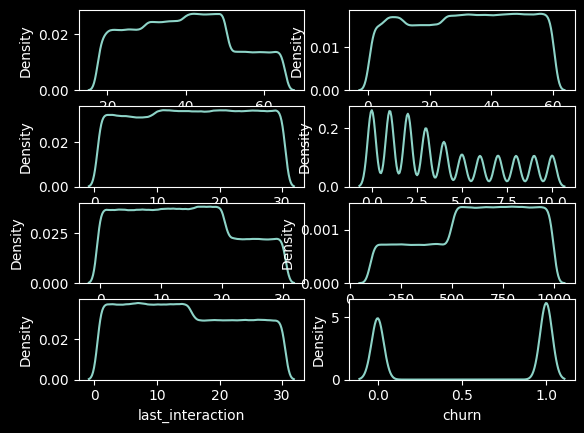

In [68]:
for i, column in enumerate(numerical_columns, start=1):
    plt.subplot(4, 2, i)
    sns.kdeplot(df[column])

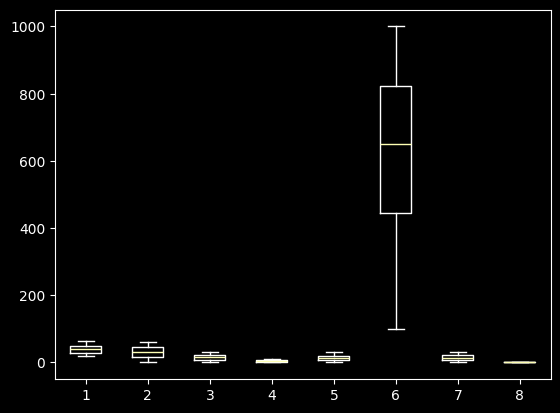

In [35]:
plt.boxplot(df.select_dtypes(np.number))
plt.show()

In [69]:
df[numerical_columns].skew()

age                 0.144318
tenure             -0.069677
usage_frequency    -0.033947
support_calls       0.544005
payment_delay         0.1997
total_spend        -0.394756
last_interaction    0.154783
churn              -0.222172
dtype: Float64

we can see all the feature are mostly in symmetric, so no need to outlier treat

In [72]:
df["churn"].value_counts()

churn
1    280492
0    224714
Name: count, dtype: Int64

and target class is in 55:45 ratio, we can handle after the model performance metrics